### Topic: Challenge Set 3
### Subject: Pandas Challenges
### Date: 10/08/2018
### Name: Maddy O'Brien Jones
### Worked: alone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## Challenge 1
Plot domestic total gross over time.

In [3]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df = df.sort_values('ReleaseDate')

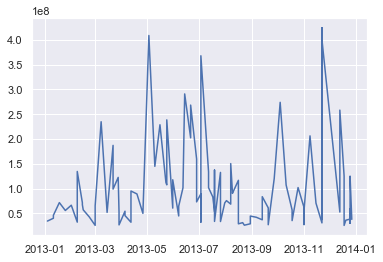

In [4]:
plt.plot(df['ReleaseDate'], df['DomesticTotalGross'])

## Challenge 2
Plot runtime vs. domestic total gross.

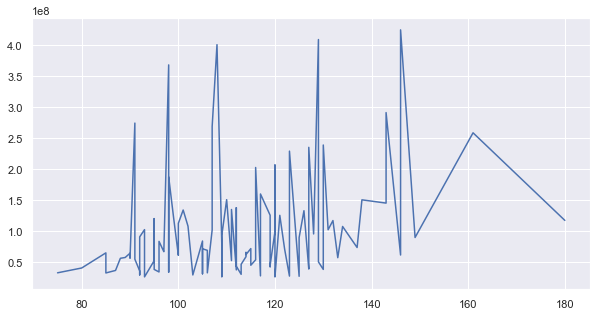

In [5]:
plt.figure(figsize=(10,5))
df = df.sort_values('Runtime')
plt.plot(df['Runtime'], df['DomesticTotalGross'])

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [6]:
rating = df.groupby(['Rating'])[['Runtime', 'DomesticTotalGross']].mean()
rating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [7]:
g = df[df['Rating']=='G'].sort_values('ReleaseDate')
pg = df[df['Rating']=='PG'].sort_values('ReleaseDate')
pg13 = df[df['Rating']=='PG-13'].sort_values('ReleaseDate')
r = df[df['Rating']=='R'].sort_values('ReleaseDate')

Text(0.5,1,'R')

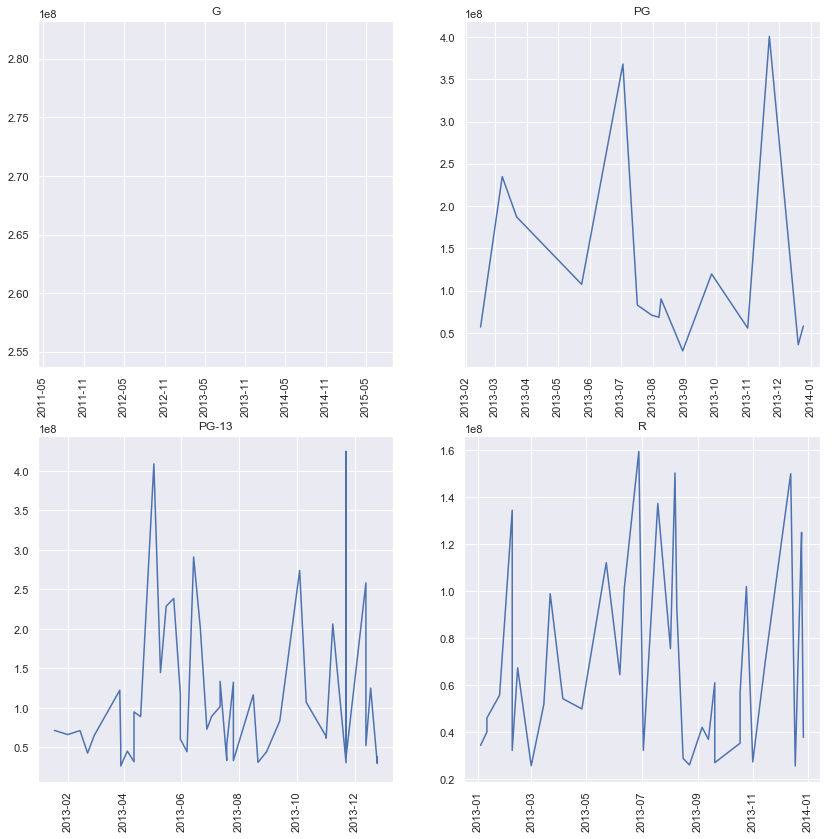

In [8]:
fig = plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.plot(g['ReleaseDate'], g['DomesticTotalGross'])
plt.xticks(rotation='vertical')
plt.title('G')

plt.subplot(2,2,2)
plt.plot(pg['ReleaseDate'], pg['DomesticTotalGross'])
plt.xticks(rotation='vertical')
plt.title('PG')

plt.subplot(2,2,3)
plt.plot(pg13['ReleaseDate'], pg13['DomesticTotalGross'])
plt.xticks(rotation='vertical')
plt.title('PG-13')

plt.subplot(2,2,4)
plt.plot(r['ReleaseDate'], r['DomesticTotalGross'])
plt.xticks(rotation='vertical')
plt.title('R')

In [9]:
g

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


Above, there is no plot for G because there is only one G-rated movie in the list: Monsters University, which had a Release Date of June 21, 2013 and a Domestic Total Gross of $268,492,764.

## Challenge 5

What director in your dataset has the highest gross per movie?

In [10]:
director = df.groupby(['Director'])['DomesticTotalGross'].max().sort_values(ascending=False).head(1)
director

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.  

Title of graph should include: Mean Domestic Total Gross by Month in 2013   

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."   

In [11]:
df = df.sort_values('ReleaseDate')

#error bars
#examine correct formula

In [12]:
df['Month'] = [str(each).split('-')[1] for each in df['ReleaseDate']]

In [13]:
import numpy as np

In [14]:
dtg_std = df.groupby('Month')['DomesticTotalGross'].std()
dtg_std = list(dtg_std)
dtg_std

[14659469.436013268,
 32831848.63377316,
 73239416.71424423,
 25301038.6867161,
 111775447.28668526,
 95199936.15060961,
 91408365.12818396,
 41322322.48349424,
 34823268.77355712,
 93943296.1711802,
 153601101.1357916,
 66838245.20225277]

In [15]:
dtg_mean = df.groupby('Month')['DomesticTotalGross'].mean()
dtg_mean = list(dtg_mean)
dtg_mean

[49543237.2,
 67386013.71428572,
 96097096.22222222,
 60940719.5,
 177409720.5,
 150650005.75,
 105780721.91666667,
 68531263.0909091,
 61712314.333333336,
 115027038.2,
 137936759.9,
 87483385.6923077]

Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

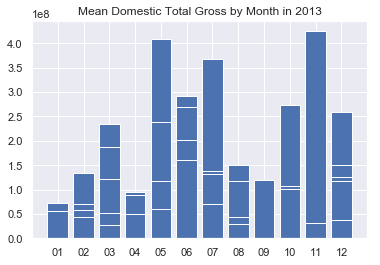

In [17]:
plt.bar(df['Month'], df['DomesticTotalGross'])
plt.title('Mean Domestic Total Gross by Month in 2013')